# Online Payment Fraud Detection

Blossom Bank also known as BB PLC is a multinational financial services group, that offers retail and investment banking, pension management, asset management and payments services, headquartered in London, UK.

Every financial institution is prone to fraudulent activities. Blossom Bank, though being susceptible to this same activity, will like to put in place a preventive measure which will predict online payment fraud using machine learning models. This project aims to achive that using the data set of previous transactions from Blossom Bank.

Machine learning algorithms are employed for this project for the following reasons:

- **Speed**: Machine learning is equivalent to having several teams of analysts running hundreds of thousands of queries and comparing the results to find the best result - all in real-time and in milliseconds. In addition to making real-time decisions, machine learning analyzes individual customer behaviour as it occurs. It is constantly analyzing 'normal' customer activity in order to detect anomalies and block or flag payments for analyst review.


- **Scalability**: Larger datasets help machine learning systems improve because they provide more examples of good and bad behaviour, such as genuine and fraudulent customers. This means that the model can detect differences and similarities in behaviours more quickly and use this information to predict fraud in future transactions.


- **Efficiency and Cost Effectiveness**: Remember that machine learning is the equivalent of several teams analyzing hundreds of thousands of payments per second. The human cost of this would be enormous - the cost of machine learning is simply the cost of running the servers.


- **Accuracy**: Machine learning models can learn from normal behaviour patterns. The patterns are clearly identified from the transaction history of each of the customers. They adapt quickly to changes in normal behaviour and can quickly identify patterns of fraudulent transactions. This means that the model can detect suspicious customers even if no chargeback has occurred.

By carefully applying the machine learning algorithms, businesses, particularly finaincial institutions will prevent loss of funds through identity theft, mobile fraud, credit fraud and fraudulent insurance claims.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import warning filter

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Data Inspection

In [3]:
df_fraud = pd.read_csv('Online Payment Fraud Detection.csv')
df_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [4]:
df_fraud.shape

(1048575, 10)

***The data has 1048575 rows and 10 columns.***

In [5]:
#inspect the data for missing values
df_fraud.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

***From the above displayed, there are no missing values in the data set.***

In [6]:
sns.set()

<AxesSubplot:title={'center':'Missing Data'}>

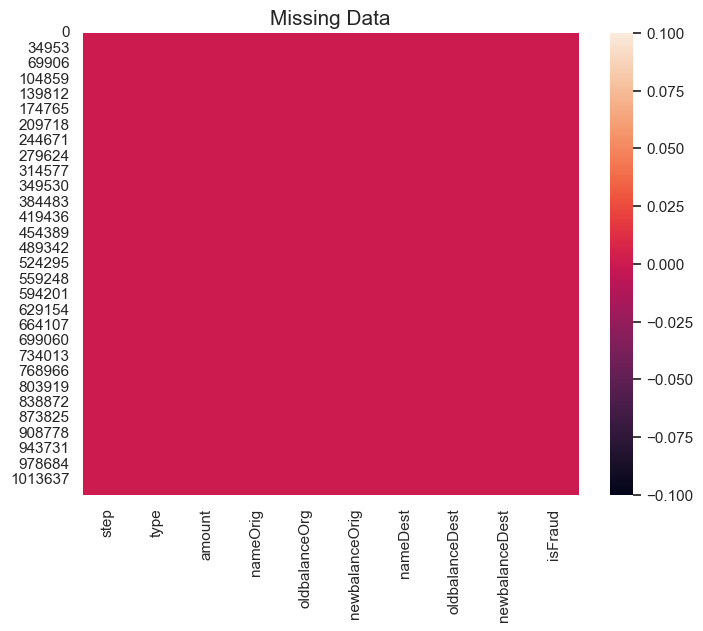

In [7]:
# Visualize the missing data on a heat map

plt.figure(figsize=(8,6))
plt.title('Missing Data', fontsize=15)
sns.heatmap(df_fraud.isnull())

***In addition, the heat map plotted above shows that there is no missing data.***

# Data Cleansing

In [8]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


***The datatypes contained in this data set are "Integers", "Floats" and "Strings". There are 10 columns including one output variable "isFraud", which tells if a particular transaction is fraudulent or non-fraudulent.*** 

In [9]:
# Let's check for any data that has been called "Unknown"
df_fraud[df_fraud=='unknown'].count()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

***There is no data listed as "Unknown" in the data set.***

In [10]:
df_fraud.describe().astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,26,158666,874009,893808,978160,1114197,0
std,15,264940,2971750,3008271,2296780,2416593,0
min,1,0,0,0,0,0,0
25%,15,12149,0,0,0,0,0
50%,20,76343,16002,0,126377,218260,0
75%,39,213761,136642,174599,915923,1149807,0
max,95,10000000,38900000,38900000,42100000,42200000,1


Let's employ statistical method to evaluate the median and modal amount of all the transactions in the data set

In [11]:
import statistics as st

What is the median amount of all the transactions?

In [12]:
st.median(df_fraud['amount'])

76343.33

What is the modal amount of all the transactions?

In [13]:
st.mode(df_fraud['amount'])

10000000.0

# Exploratory Data Analysis

In this section, the data set was visualized to give a better understanding

## Univariate Analysis

### Distribution of amount for every transaction

The purpose of this is to inspect if there are any outliers or anomalies in the transaction amount.

<AxesSubplot:ylabel='amount'>

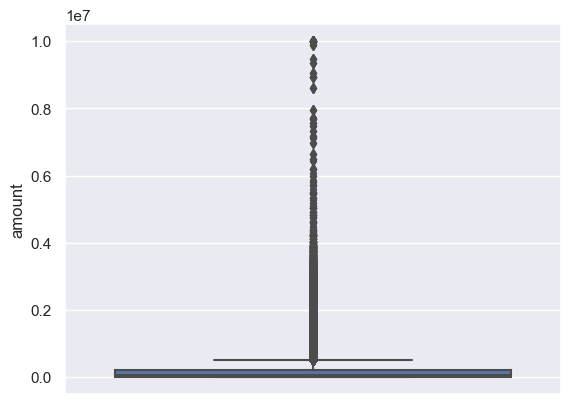

In [14]:
sns.boxplot(y=df_fraud['amount'])

***The least transaction in the amount column of this data set is 0 and the mean amount is 26. However, there are much larger transactions which appear as outliers in the box plot. This should be taken note of before training our data to avoid prediction bias.***

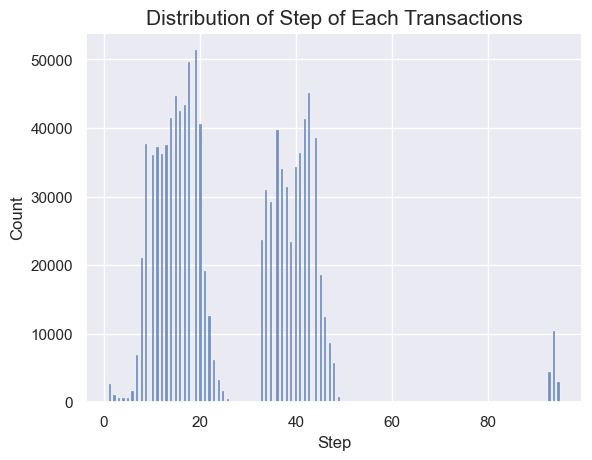

In [15]:
plt.title('Distribution of Step of Each Transactions', fontsize=15)
sns.histplot(x='step', data=df_fraud,)

plt.xlabel('Step')
plt.show()

In [16]:
type_count = df_fraud.groupby('type')['type'].count()
type_count.sort_values(ascending=False)

type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

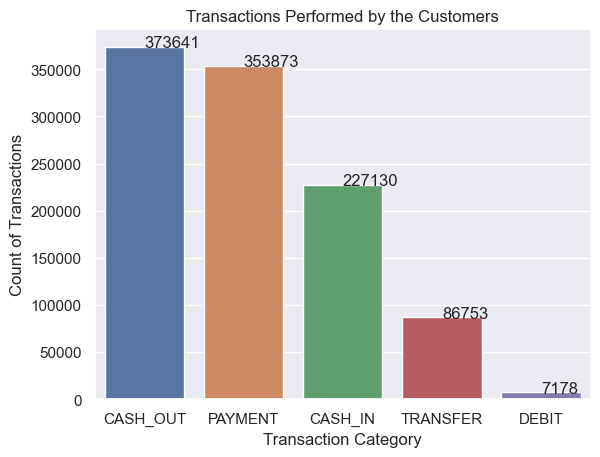

In [17]:
# What are the categories of transactions and how many times were they performed?

plt.title('Transactions Performed by the Customers')
sns.countplot(x='type', data=df_fraud, 
              order=['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'])
for i, value in enumerate(type_count.sort_values(ascending=False)):
    plt.text(i, value-300, str(value), fontsize=12)

plt.xlabel('Transaction Category')
plt.ylabel('Count of Transactions')
plt.show()

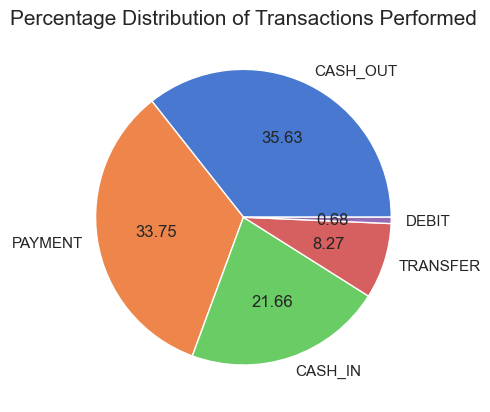

In [18]:
# Precentage Distribution of Transaction Performed by Clients

labels = ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT']
plt.pie(x= type_count.sort_values(ascending=False), labels= labels, 
        colors= sns.color_palette('muted'), autopct= '%.2f')
plt.title('Percentage Distribution of Transactions Performed', fontsize=15)
plt.show()

***From the bar chart and pie chart above, CASH_OUT is the most performed transaction.***

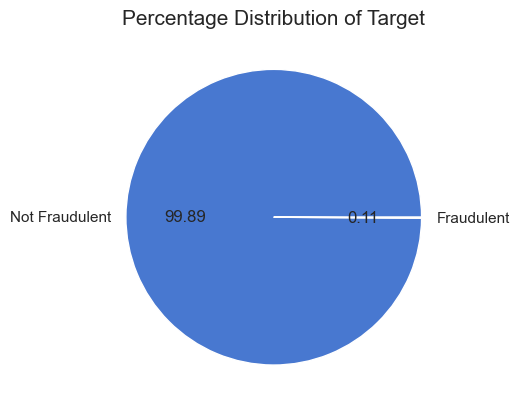

In [19]:
# Distribution of Fraudulent and Non-Fraudulent Transactions (TARGET)

plt.pie(x= df_fraud.groupby('isFraud')['isFraud'].count(), labels= ['Not Fraudulent', 'Fraudulent'], 
        colors= sns.color_palette('muted'), autopct= '%.2f')
plt.title('Percentage Distribution of Target', fontsize=15)
plt.show()

***The pie chart above shows that the data set contains a lot more non-fraudulent transactions. It is important that this is kept in mind when training our machine learning models to avoid issues from class imbalancing.***

## Bivariate Analysis

<AxesSubplot:>

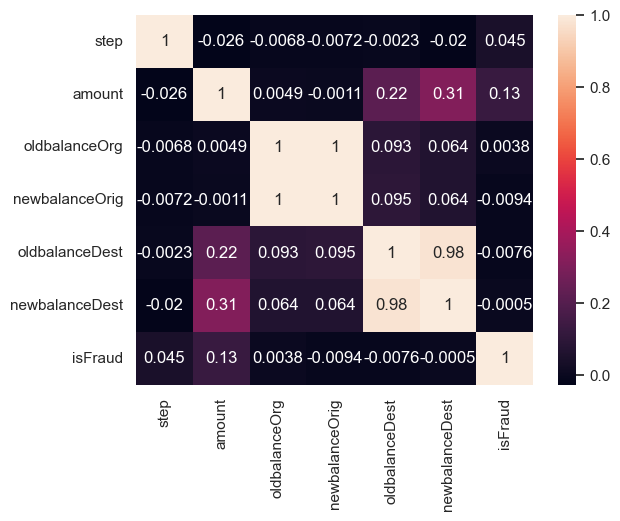

In [20]:
corl = df_fraud.corr()
sns.heatmap(corl, annot=True)

***We can observe strong positive correlations between the balance of the recepient before and after the transactions. We also observe a strong positive correlation between the bank balances of the Org before and after the transactions.***

Text(0, 0.5, 'Recepient Balance Before Transaction')

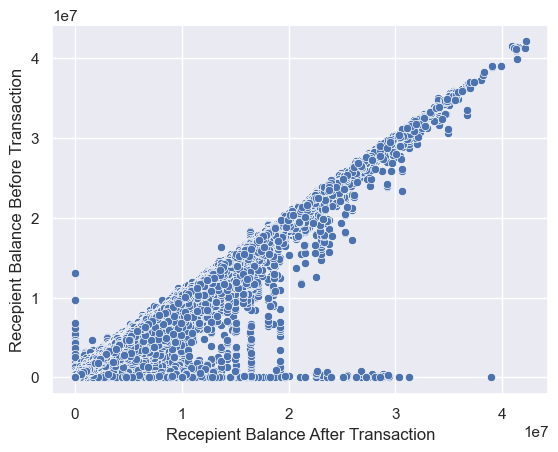

In [21]:
# Relationship between the balances of the recepient before and after the transactions?

sns.scatterplot(x='newbalanceDest', y='oldbalanceDest', data=df_fraud)
plt.xlabel('Recepient Balance After Transaction')
plt.ylabel('Recepient Balance Before Transaction')

***We can observe a linear progressive relationship between these features.***

Text(0, 0.5, 'Balance Before Transaction')

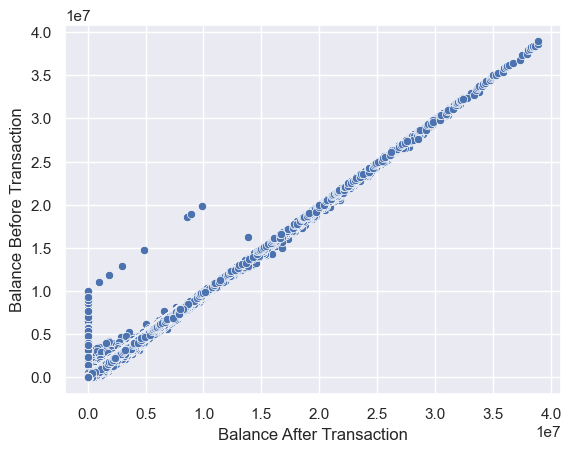

In [22]:
# Relationship between the balances of Orig before and after the transactions?

sns.scatterplot(x='newbalanceOrig', y='oldbalanceOrg', data=df_fraud)
plt.xlabel('Balance After Transaction')
plt.ylabel('Balance Before Transaction')

***We can observe a linear progressive relationship between these features.***

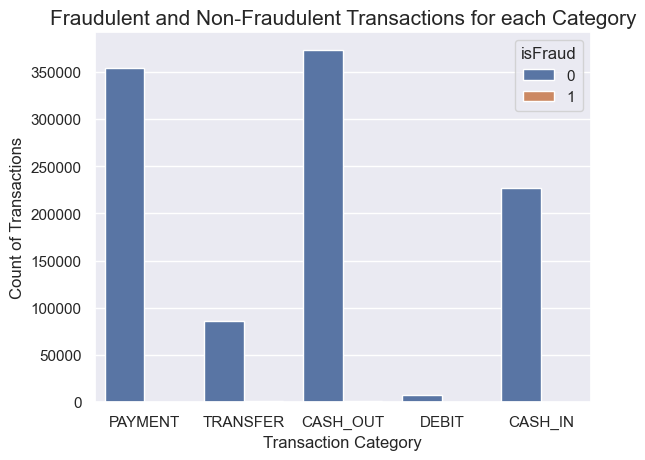

In [23]:
# Fraudulent and Non-Fraudulent Transactions for each Transaction Category 

plt.title('Fraudulent and Non-Fraudulent Transactions for each Category', fontsize=15)
sns.countplot(x='type', data=df_fraud, hue='isFraud')
plt.xlabel('Transaction Category', fontsize= 12)
plt.ylabel('Count of Transactions', fontsize= 12)
plt.show()

***The bar chart above clearly displays that the number of fraudulent transactions for each category are negligible. This is because there are way more candid transactions than fraudulent transactions in the data set.***

## Multivariate Analysis

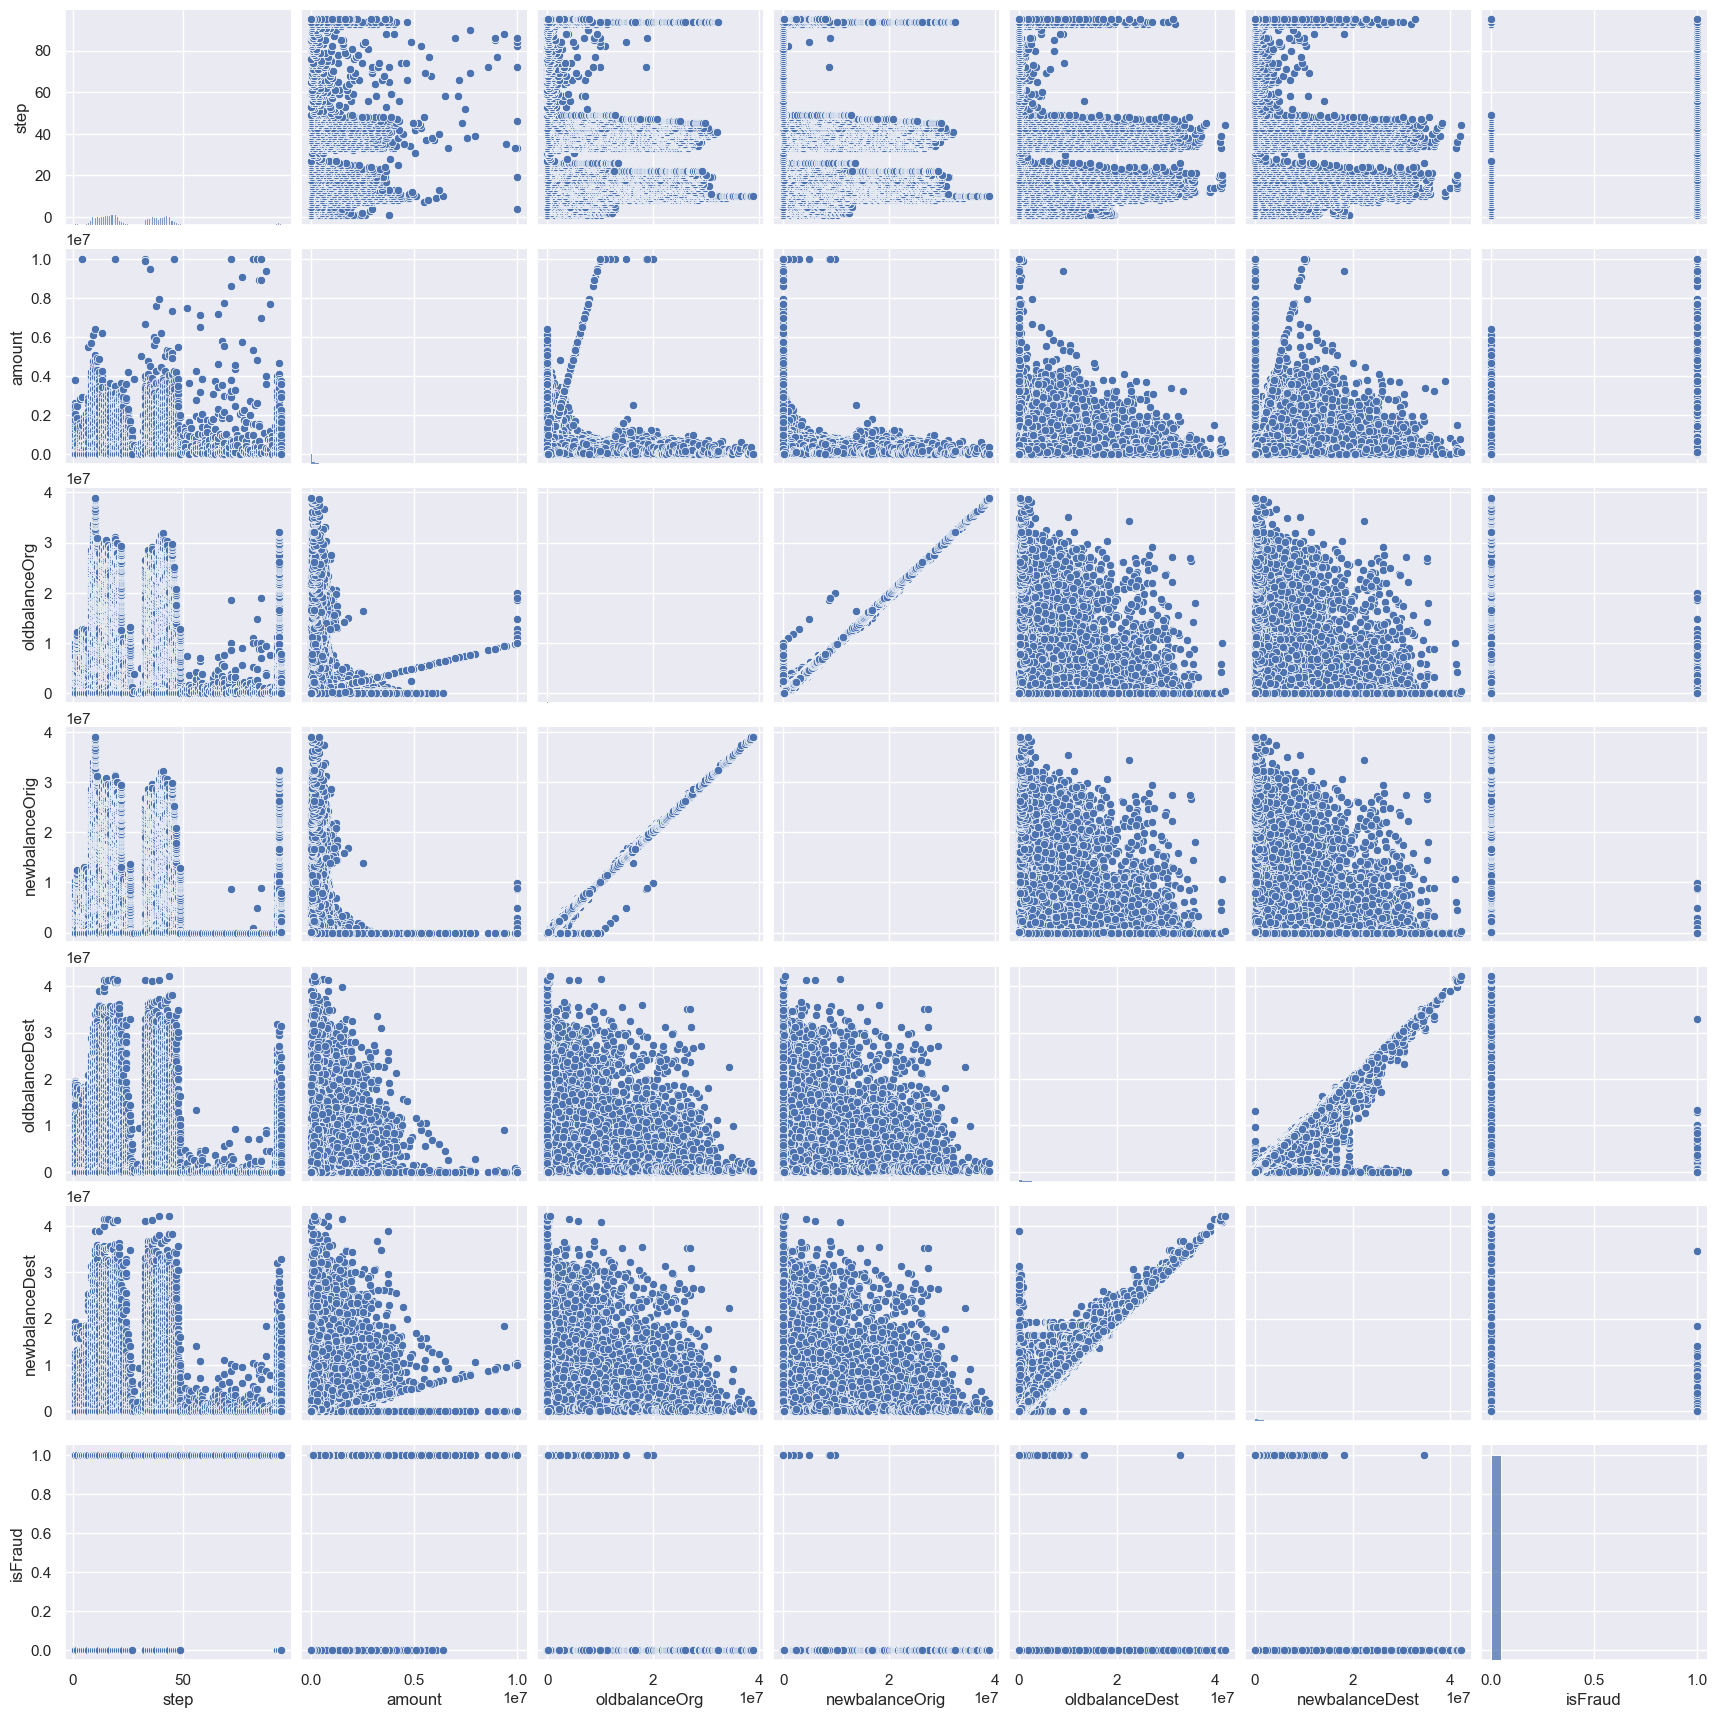

In [24]:
sns.pairplot(df_fraud)

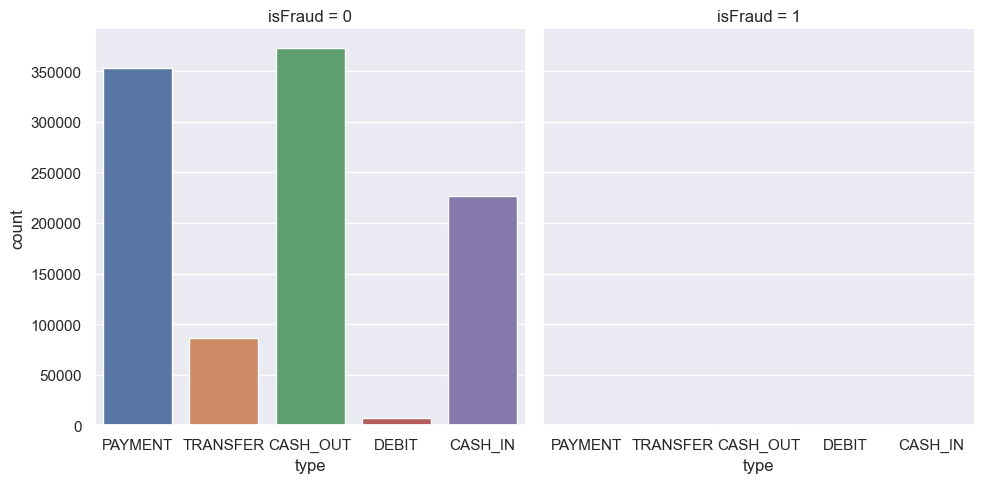

In [25]:
sns.catplot(x='type', data=df_fraud, col='isFraud', kind='count')

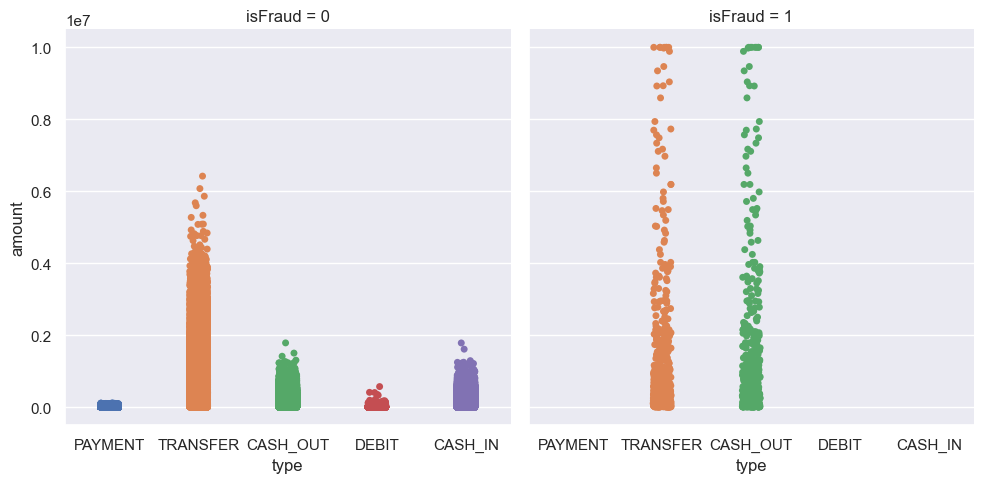

In [26]:
sns.catplot(x='type', y='amount', data=df_fraud, col='isFraud', kind='strip')

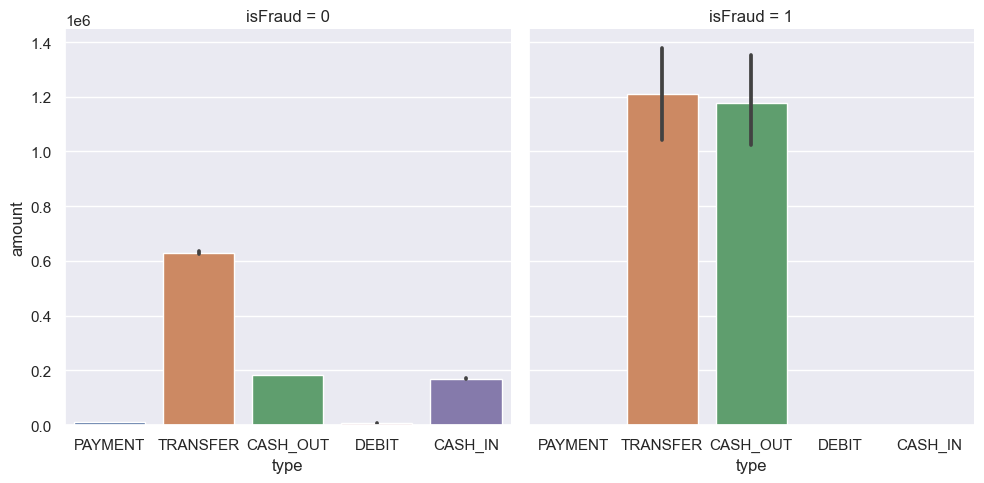

In [27]:
sns.catplot(x='type', y='amount', data=df_fraud, col='isFraud', kind='bar')

***The charts in cells x and y above show that Blossom Bank has lost approximately 2.4 million to fraudulent transactions through Transfers and Cash Out.***

# Modelling

In this section, you will train and evaluate your models

**Before we begin to train and evaluate the models, let's try to understand the target variable. Our target variable/column is "isFraud" which tells us if the number of fraudulent and non-fraudulent transactions.** 

In [28]:
df_fraud.isFraud.value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

## Feature Engineering

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
# Scaling Numerical Data Using Standard Scaler

numeric_variables = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

scaler = StandardScaler()
df_fraud[numeric_variables]  = scaler.fit_transform(df_fraud[numeric_variables])
print(df_fraud[numeric_variables])

             step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0       -1.662022 -0.561738      -0.236855       -0.243832       -0.425883   
1       -1.662022 -0.591840      -0.286956       -0.290673       -0.425883   
2       -1.662022 -0.598194      -0.294045       -0.297117       -0.425883   
3       -1.662022 -0.598194      -0.294045       -0.297117       -0.416661   
4       -1.662022 -0.554837      -0.280123       -0.287183       -0.425883   
...           ...       ...            ...             ...             ...   
1048570  4.354654 -0.098549      -0.132651       -0.181687       -0.215010   
1048571  4.354654 -0.561445      -0.263638       -0.270315       -0.425883   
1048572  4.354654 -0.545506      -0.287193       -0.294988       -0.425883   
1048573  4.354654 -0.561057      -0.263617       -0.270329       -0.425883   
1048574  4.354654 -0.555660      -0.266989       -0.274136       -0.425883   

         newbalanceDest  
0             -0.461062  
1          

**Next, we encode the other columns of the dataset that are categorical into numerical using one hot encoding**

In [31]:
encoded_data = pd.get_dummies(df_fraud['type'])
encoded_data.head()

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [32]:
# Now we merge or concatenate the encoded data to the original dataframe

df_fraud = pd.concat([df_fraud, encoded_data], axis=1)

print(df_fraud.shape)
df_fraud.head()

(1048575, 15)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,-1.662022,PAYMENT,-0.561738,C1231006815,-0.236855,-0.243832,M1979787155,-0.425883,-0.461062,0,0,0,0,1,0
1,-1.662022,PAYMENT,-0.591840,C1666544295,-0.286956,-0.290673,M2044282225,-0.425883,-0.461062,0,0,0,0,1,0
2,-1.662022,TRANSFER,-0.598194,C1305486145,-0.294045,-0.297117,C553264065,-0.425883,-0.461062,1,0,0,0,0,1
3,-1.662022,CASH_OUT,-0.598194,C840083671,-0.294045,-0.297117,C38997010,-0.416661,-0.461062,1,0,1,0,0,0
4,-1.662022,PAYMENT,-0.554837,C2048537720,-0.280123,-0.287183,M1230701703,-0.425883,-0.461062,0,0,0,0,1,0


In [33]:
# Now that we have encoded our data, we must drop the categorical data - 'type', 'nameOrig' and 'nameDest'

df_fraud = df_fraud.drop(['type', 'nameOrig', 'nameDest'], axis=1)
df_fraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,-1.662022,-0.561738,-0.236855,-0.243832,-0.425883,-0.461062,0,0,0,0,1,0
1,-1.662022,-0.591840,-0.286956,-0.290673,-0.425883,-0.461062,0,0,0,0,1,0
2,-1.662022,-0.598194,-0.294045,-0.297117,-0.425883,-0.461062,1,0,0,0,0,1
3,-1.662022,-0.598194,-0.294045,-0.297117,-0.416661,-0.461062,1,0,1,0,0,0
4,-1.662022,-0.554837,-0.280123,-0.287183,-0.425883,-0.461062,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,4.354654,-0.098549,-0.132651,-0.181687,-0.215010,-0.205790,0,0,1,0,0,0
1048571,4.354654,-0.561445,-0.263638,-0.270315,-0.425883,-0.461062,0,0,0,0,1,0
1048572,4.354654,-0.545506,-0.287193,-0.294988,-0.425883,-0.461062,0,0,0,0,1,0
1048573,4.354654,-0.561057,-0.263617,-0.270329,-0.425883,-0.461062,0,0,0,0,1,0


## Select Target

In [34]:
y = df_fraud['isFraud']
print(y.head())

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64


## Select Features

In [35]:
X = df_fraud.drop(['isFraud'], axis=1)
print(X.head())

       step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0 -1.662022 -0.561738      -0.236855       -0.243832       -0.425883   
1 -1.662022 -0.591840      -0.286956       -0.290673       -0.425883   
2 -1.662022 -0.598194      -0.294045       -0.297117       -0.425883   
3 -1.662022 -0.598194      -0.294045       -0.297117       -0.416661   
4 -1.662022 -0.554837      -0.280123       -0.287183       -0.425883   

   newbalanceDest  CASH_IN  CASH_OUT  DEBIT  PAYMENT  TRANSFER  
0       -0.461062        0         0      0        1         0  
1       -0.461062        0         0      0        1         0  
2       -0.461062        0         0      0        0         1  
3       -0.461062        0         1      0        0         0  
4       -0.461062        0         0      0        1         0  


## Train Test Split

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [37]:
#Split data into training and validation sets using a 30% split ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [38]:
print(X_train.head())
print()
print(X_test.head())
print()
print(y_train.head())
print()
print(y_test.head())

            step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
501973 -0.445885 -0.546012      -0.277440       -0.285310       -0.425883   
207379 -0.893936 -0.497696      -0.286726       -0.297117       -0.425883   
609203  0.450215 -0.102467      -0.208655       -0.256423        1.255153   
45997  -1.149964 -0.503068      -0.284326       -0.295894       -0.425883   
782988  0.770251 -0.555848      -0.290676       -0.297117       -0.425883   

        newbalanceDest  CASH_IN  CASH_OUT  DEBIT  PAYMENT  TRANSFER  
501973       -0.461062        0         0      0        1         0  
207379       -0.461062        0         0      0        1         0  
609203        1.191054        0         1      0        0         0  
45997        -0.461062        0         0      0        1         0  
782988       -0.461062        0         0      0        1         0  

            step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
879625  0.962273 -0.571342      -0.2876

## Import ML algorithms and initialize them

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
# Initialize all the algorithms
LR = LogisticRegression(random_state=40)
KN = KNeighborsClassifier()
DC = DecisionTreeClassifier(random_state=30)
RF = RandomForestClassifier(random_state=36)

## Train and Test the models

In [41]:
def c_matrix_plot(prediction, y_test):

    c_matrix = confusion_matrix(prediction, y_test)
    group_names = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
    group_counts = ["{0:0.0f}".format(value) for value in
                    c_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         c_matrix.flatten()/np.sum(c_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    ax = sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Greens')

    ax.set_title(f'Confusion Matix for {model.__class__.__name__}');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ax.xaxis.set_ticklabels(['Non-Fraudulent', 'Fraudulent'])
    ax.yaxis.set_ticklabels(['Non-Fraudulent', 'Fraudulent'])

    plt.show()

In [42]:
models = [LR, KN, DC, RF]

def trainer(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train) #fit the model
    prediction = model.predict(X_test) # create predictions on the fitted model
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__, accuracy_score(prediction, y_test)))
    print(classification_report(prediction, y_test))
    print(confusion_matrix(prediction, y_test))
    c_matrix_plot(prediction, y_test)

/Users/boluwatifeoduyemi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



For LogisticRegression, Accuracy score is 0.9993292494905793 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314446
           1       0.37      0.94      0.53       127

    accuracy                           1.00    314573
   macro avg       0.69      0.97      0.77    314573
weighted avg       1.00      1.00      1.00    314573

[[314242    204]
 [     7    120]]


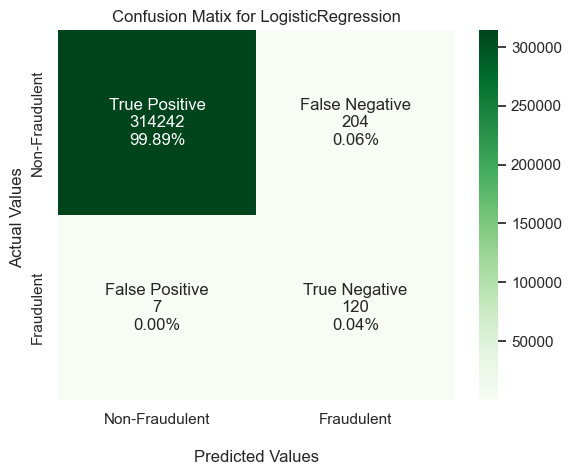


For KNeighborsClassifier, Accuracy score is 0.9995581311809978 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314380
           1       0.58      0.98      0.73       193

    accuracy                           1.00    314573
   macro avg       0.79      0.99      0.87    314573
weighted avg       1.00      1.00      1.00    314573

[[314245    135]
 [     4    189]]


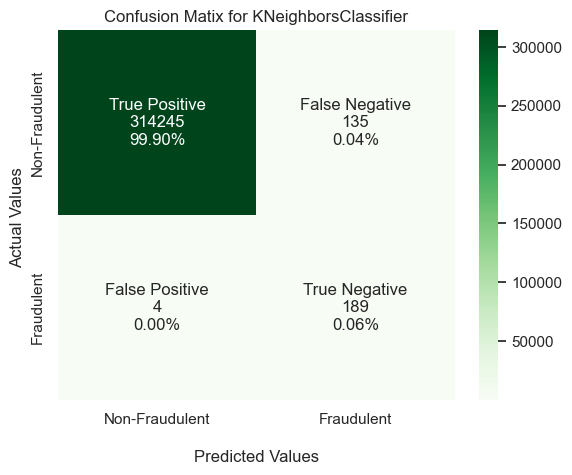


For DecisionTreeClassifier, Accuracy score is 0.999672572026207 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314246
           1       0.85      0.84      0.84       327

    accuracy                           1.00    314573
   macro avg       0.92      0.92      0.92    314573
weighted avg       1.00      1.00      1.00    314573

[[314196     50]
 [    53    274]]


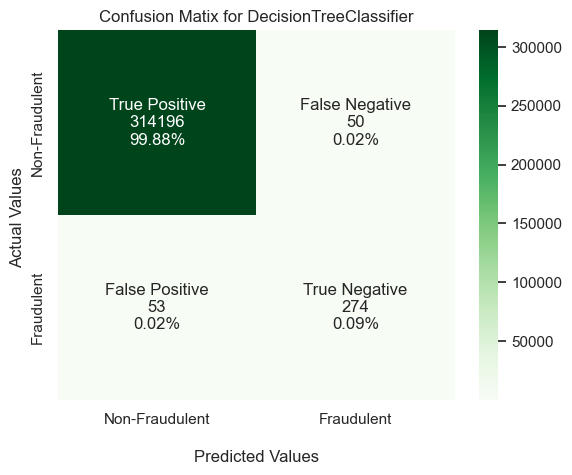


For RandomForestClassifier, Accuracy score is 0.9998092652579846 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314299
           1       0.83      0.98      0.90       274

    accuracy                           1.00    314573
   macro avg       0.92      0.99      0.95    314573
weighted avg       1.00      1.00      1.00    314573

[[314244     55]
 [     5    269]]


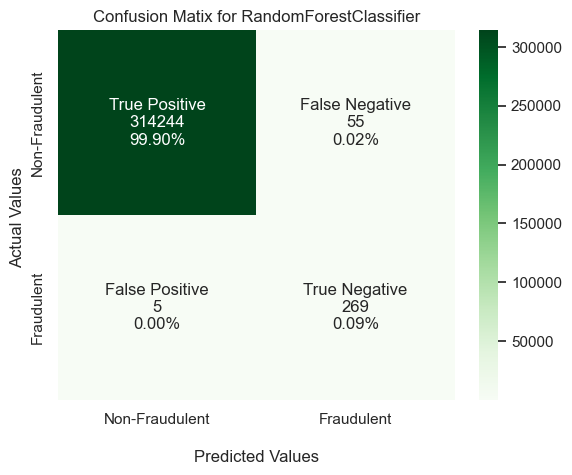

In [43]:
# loop through each model, training in the process
for model in models:
    trainer(model, X_train, y_train, X_test, y_test)

## Model Evaluation

Online payment fraud for Blossom Bank was predicted using the following machine learning models:
- Logistic Regression 
- K Neighbors Classifier
- Decision Tree Classifier
- Random Forest Classifier

The following observations can be made from the classification report generated for each of the models.

- By inspecting the accuracy, precision and most importantly, recall, all of the models did quite well in predicting online fraud. They produce a recall ranging from 84% to 98% and an accuracy of approximately 100%.

- In general, the Random Forest Classifier model did best in predicting the online payment fraud for Blossom Bank. It produced an accuracy of 99.975% (approximately 100%). However, we do not only measure the performance based on the accuracy. Looking at the recall, we observe that it gives the highest recall of 98%. The recall shows the proportion of true positives identified by the model is 98%. In addition, the same model produces an f1-score of 90%.  



In addition, the confusuion matrix generated shows the distribution of 
- True Positives i.e. transactions that are actually non-fraudulent and predicted by the model as non-fraudulent,
- False Positives i.e. transactions which are actually fraudulent but predicted as non-fraudulent,
- False Negatives i.e. transactions that are actually non-fradulent but predicted as fraudulent,
- True Negatives i.e. transactions which are actually fraudulent and predicted as fraudulent.

False Positives should be avoided or as minimal as possible because the implication is that Blossom Bank would have been successfully defrauded without the system alerting them. The effects of having trasactions like this will be worse than having False Negatives. False Negatives will flag the transactions but could be easily clarified by the customer as non-fraudulent.

## Feature Importance

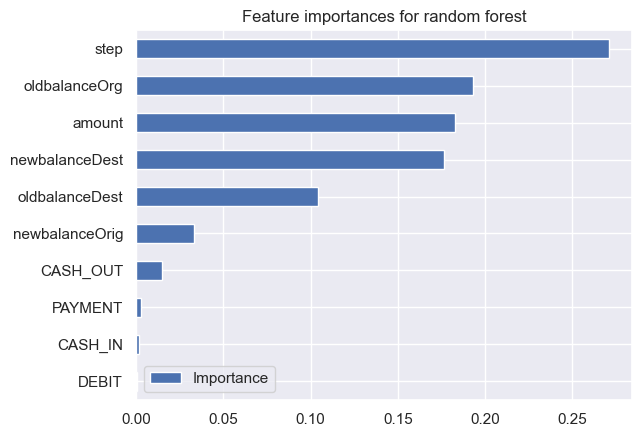

In [44]:
#get feature importances
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_test.columns, columns=['Importance'])

#plot top 10 feature importances, sorted
RF_importances[:10].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for random forest')
plt.show()

In [45]:
#get these top 10 importances
RF_importances[:10].sort_values(by='Importance').index.values

array(['DEBIT', 'CASH_IN', 'PAYMENT', 'CASH_OUT', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'amount', 'oldbalanceOrg',
       'step'], dtype=object)

## Feature Selection

What is the effect of having the most important features on the accuracy of the model?

In [46]:
#create a new X train with only 10 features
X_train2 = X_train[['DEBIT', 'CASH_IN', 'PAYMENT', 'CASH_OUT', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'oldbalanceOrg', 'amount',
       'step']]
X_train2.head(2)

,DEBIT,CASH_IN,PAYMENT,CASH_OUT,newbalanceOrig,oldbalanceDest,newbalanceDest,oldbalanceOrg,amount,step
501973,0,0,1,0,-0.285310,-0.425883,-0.461062,-0.277440,-0.546012,-0.445885
207379,0,0,1,0,-0.297117,-0.425883,-0.461062,-0.286726,-0.497696,-0.893936


In [49]:
#create a new X_valid with only 10 features so we can predict on them
X_test2 = X_test[['DEBIT', 'CASH_IN', 'PAYMENT', 'CASH_OUT', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'oldbalanceOrg', 'amount',
       'step']]

In [50]:
#train and predict
RF.fit(X_train2, y_train)
pred2 = RF.predict(X_test2)

print(accuracy_score(pred2, y_test))
print(classification_report(pred2, y_test))

0.9998156230827184
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314299
           1       0.83      0.99      0.90       274

    accuracy                           1.00    314573
   macro avg       0.92      0.99      0.95    314573
weighted avg       1.00      1.00      1.00    314573



***In cell 44 and 45 above, the features which contribute the most to our predictions are shown. After running the prediction using Random Forest Classifier, we arrived at much better results than the previous predictions.***

Without a doubt these features, displayed above, contribute the most to the predictions and further testing using only them improves our predictions. We arrived at a recall of 99% and accuracy score of 99.98% which is almost perfect in predicting fraudulent transactions.

## Summary

What model should be deployed to production?
Any other comments?

From the results generated and the performance of each of our models, we can infere that the **RANDOM FOREST CLASSIFIER** model is the best fit to predict online fraud payment for Blossom Bank and should therefore be deployed.